# Flight Fare Prediction 

# Business case

Here we are going to predict Flight Fare as we know how flight fare is unpredictable
hence we will try to predict the charges using machine learning Algorithm.

Below short descrption on main contents.

Airline : As a result, this article will include all sorts of airlines such as indigo, Jet Airways, Air India, among others

Date_of_Journey	: This column will infor us of the date the passenger's travel will begin

Source : This column includes the names of the location from which the guest's journey will begin

Destination : This column contains the names of the location where the passenger's journey will ends

Route : This column includes the names of the location from where the passenger's journey would begin

Departure Time : The durations of a flight is the amount of time it takes to go from point A to point B

Arrival Time : It will indicate how many spots the flight will stop iver its Journey

Duration : The flight's endurance in hours

Total_Stops : The total number of breaks in the voyage

Additional Info : It will indicate whether a meal is included with the journey or not


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os

In [3]:
os.getcwd()

'C:\\Users\\hp'

In [4]:
os.chdir('C:\\Users\\hp\\Documents')

In [5]:
os.getcwd()

'C:\\Users\\hp\\Documents'

In [8]:
data=pd.read_excel('Flight_Fare.xlsx')

In [735]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [736]:
## checking data info

In [737]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [738]:
data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [739]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [740]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


# Exploratory Data Analysis

#### Univariate Analysis

In [741]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [742]:
data['Route'].fillna(method ='ffill', inplace = True)

In [743]:
data['Total_Stops'].fillna(method ='ffill', inplace=True)

In [744]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [745]:
import sweetviz as sv
my_report =sv.analyze(data)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<AxesSubplot:xlabel='Source', ylabel='count'>

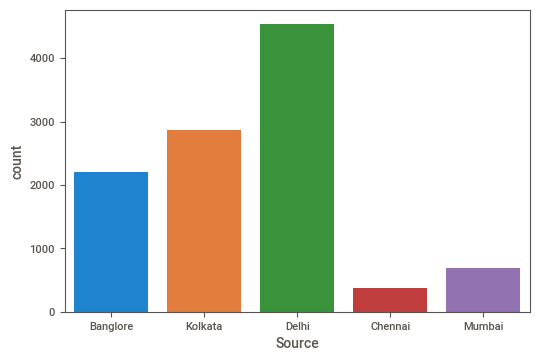

In [746]:
sns.countplot('Source',data=data)

<AxesSubplot:xlabel='Destination', ylabel='count'>

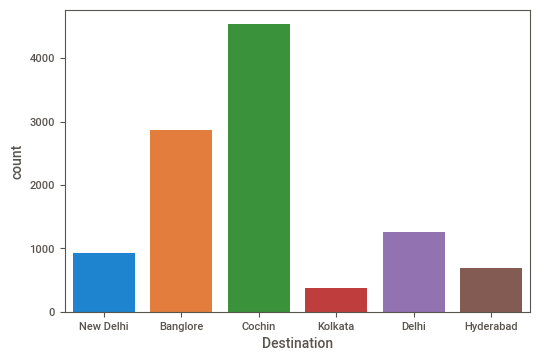

In [747]:
sns.countplot('Destination',data=data)

### Bivariate Analysis

<AxesSubplot:xlabel='Source', ylabel='Price'>

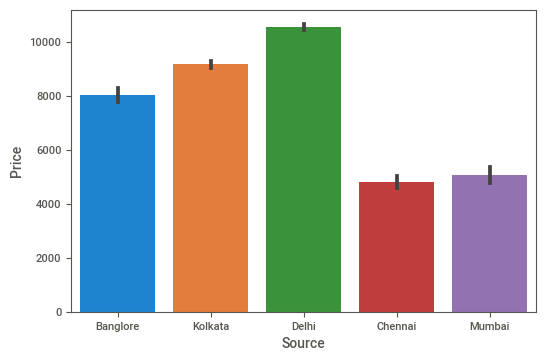

In [748]:
sns.barplot(x='Source',y='Price',data=data)

<AxesSubplot:xlabel='Destination', ylabel='Price'>

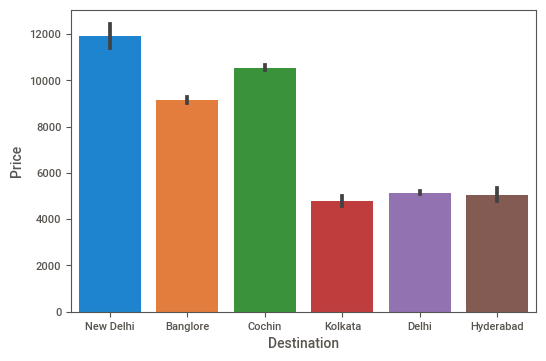

In [749]:
sns.barplot(x='Destination', y='Price',data=data)

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

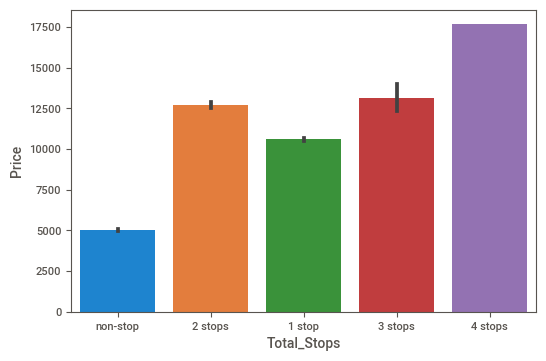

In [750]:
sns.barplot(x='Total_Stops', y='Price', data=data)

In [751]:
data.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [752]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [753]:
data1=data[['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info']]

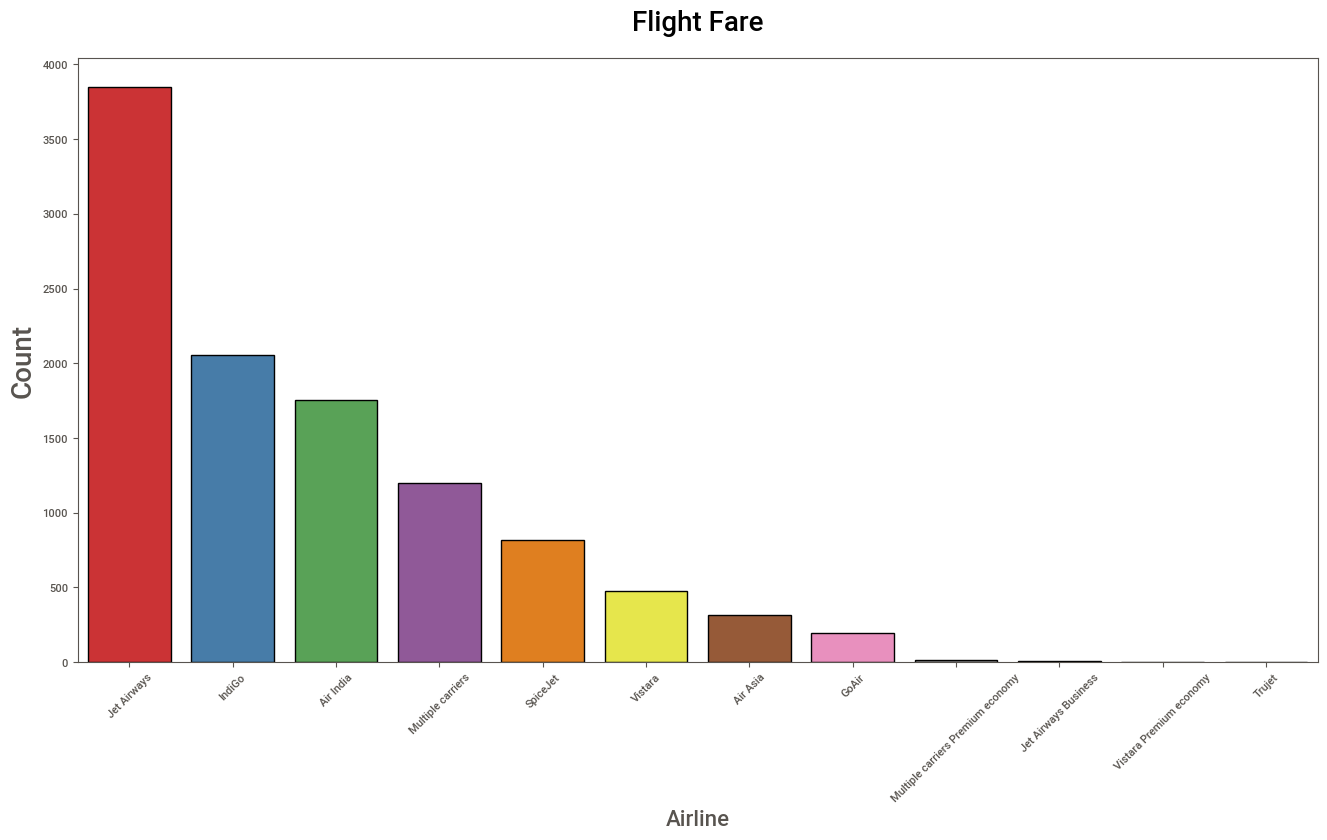

In [754]:
plt.subplots(figsize=(16,8))
sns.countplot(x='Airline', data=data, ec='black', palette='Set1', order=data['Airline'].value_counts().index)
plt.title('Flight Fare', weight='bold', fontsize=20, pad=20)
plt.ylabel('Count', weight='bold', fontsize=20)
plt.xlabel('Airline', weight='bold', fontsize=16)
plt.xticks(rotation=45)
plt.show()

# Data Preprocessing

In [755]:
## Creating the list of categorica; columns

category = ['Airline','Source','Destination','Additional_Info']

In [756]:
#3 checking unique values in Airline columns

for i in category:
    print(i, data[i].unique())
    print('---------------------------------------')

Airline ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
---------------------------------------
Source ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
---------------------------------------
Destination ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
---------------------------------------
Additional_Info ['No info' 'In-flight meal not included' 'No check-in baggage included'
 '1 Short layover' 'No Info' '1 Long layover' 'Change airports'
 'Business class' 'Red-eye flight' '2 Long layover']
---------------------------------------


In [757]:
# Teating the Date column

data.Date_of_Journey = data.Date_of_Journey.str.split('/')

In [758]:
data.Date_of_Journey

0        [24, 03, 2019]
1         [1, 05, 2019]
2         [9, 06, 2019]
3        [12, 05, 2019]
4        [01, 03, 2019]
              ...      
10678     [9, 04, 2019]
10679    [27, 04, 2019]
10680    [27, 04, 2019]
10681    [01, 03, 2019]
10682     [9, 05, 2019]
Name: Date_of_Journey, Length: 10683, dtype: object

In [759]:
data['Date'] = data.Date_of_Journey.str[0]
data['Month'] = data.Date_of_Journey.str[1]
data['Year'] = data.Date_of_Journey.str[2]

In [760]:
data.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [761]:
data.Route.unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In [762]:
# Route and total_stops are related yo each other
#Route and addiyional information are not crertain much information
# we will dor Route and additional Info

data.drop(['Route','Additional_Info'], axis=1, inplace = True)

In [763]:
data

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Date,Month,Year
0,IndiGo,"[24, 03, 2019]",Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24,03,2019
1,Air India,"[1, 05, 2019]",Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,1,05,2019
2,Jet Airways,"[9, 06, 2019]",Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882,9,06,2019
3,IndiGo,"[12, 05, 2019]",Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218,12,05,2019
4,IndiGo,"[01, 03, 2019]",Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302,01,03,2019
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,"[9, 04, 2019]",Kolkata,Banglore,19:55,22:25,2h 30m,non-stop,4107,9,04,2019
10679,Air India,"[27, 04, 2019]",Kolkata,Banglore,20:45,23:20,2h 35m,non-stop,4145,27,04,2019
10680,Jet Airways,"[27, 04, 2019]",Banglore,Delhi,08:20,11:20,3h,non-stop,7229,27,04,2019
10681,Vistara,"[01, 03, 2019]",Banglore,New Delhi,11:30,14:10,2h 40m,non-stop,12648,01,03,2019


In [764]:
#Treating dep time column

data.Dep_Time = data.Dep_Time.str.split(':')

data['Dep_Time_Hour'] = data.Dep_Time.str[0]
data['Dep_Time_Min'] = data.Dep_Time.str[1]

In [765]:
# Treating the arrival time column

data.Arrival_Time = data.Arrival_Time.str.split(' ')
data['Arrival_date'] = data.Arrival_Time.str[1]

In [766]:
data['Time_of_arrival']= data.Arrival_Time.str[0]
data['Time_of_arrival'] = data.Time_of_arrival.str.split(':')

data['Arrival_Time_Hour'] = data.Time_of_arrival.str[0]
data['Arrival_Time_Min'] = data.Time_of_arrival.str[1]

In [767]:
# Treating the duration column into duration_hours and duration_mins

duration=list(data['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]:
            duration[i]=duration[i]+ '0m'
        else:
                duration[i]= '0h' + duration[i]

In [768]:
def hour(x):
    return x.split(' ')[0][0:-1]

def minutes(x):
    return x.split(' ')[0][0:-1]

In [769]:
data['dur_hour']=data['Duration'].apply(hour)

data['dur_min']=data['Duration'].apply(minutes)

In [770]:
## Treating the total stop columns

data.Total_Stops.replace('non-stop','0', inplace = True)

data.Total_Stops = data.Total_Stops.str.split(' ')

data.Total_Stops = data.Total_Stops.str[0]

In [771]:
data.drop(['Date_of_Journey','Dep_Time','Arrival_Time','Duration','Time_of_arrival'], axis=1, inplace = True)

### Replacing The Misiing Values

In [772]:
data.head(4)

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_Time_Hour,Dep_Time_Min,Arrival_date,Arrival_Time_Hour,Arrival_Time_Min,dur_hour,dur_min
0,IndiGo,Banglore,New Delhi,0,3897,24,03,2019,22,20,22,01,10,2,2
1,Air India,Kolkata,Banglore,2,7662,1,05,2019,05,50,NaN,13,15,7,7
2,Jet Airways,Delhi,Cochin,2,13882,9,06,2019,09,25,10,04,25,19,19
3,IndiGo,Kolkata,Banglore,1,6218,12,05,2019,18,05,NaN,23,30,5,5


In [773]:
## Due to column splitting we have invited some more NAn values

data.isnull().sum()

Airline                 0
Source                  0
Destination             0
Total_Stops             0
Price                   0
Date                    0
Month                   0
Year                    0
Dep_Time_Hour           0
Dep_Time_Min            0
Arrival_date         6348
Arrival_Time_Hour       0
Arrival_Time_Min        0
dur_hour                0
dur_min                 0
dtype: int64

In [774]:
## Here we are using fillna method to replace missing values


data['Total_Stops'].fillna('None', inplace = True)

data['Arrival_date'].fillna(data['Date'],inplace = True)


In [775]:
data

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_Time_Hour,Dep_Time_Min,Arrival_date,Arrival_Time_Hour,Arrival_Time_Min,dur_hour,dur_min
0,IndiGo,Banglore,New Delhi,0,3897,24,03,2019,22,20,22,01,10,2,2
1,Air India,Kolkata,Banglore,2,7662,1,05,2019,05,50,1,13,15,7,7
2,Jet Airways,Delhi,Cochin,2,13882,9,06,2019,09,25,10,04,25,19,19
3,IndiGo,Kolkata,Banglore,1,6218,12,05,2019,18,05,12,23,30,5,5
4,IndiGo,Banglore,New Delhi,1,13302,01,03,2019,16,50,01,21,35,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,04,2019,19,55,9,22,25,2,2
10679,Air India,Kolkata,Banglore,0,4145,27,04,2019,20,45,27,23,20,2,2
10680,Jet Airways,Banglore,Delhi,0,7229,27,04,2019,08,20,27,11,20,3,3
10681,Vistara,Banglore,New Delhi,0,12648,01,03,2019,11,30,01,14,10,2,2


In [776]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10683 non-null  object
 1   Source             10683 non-null  object
 2   Destination        10683 non-null  object
 3   Total_Stops        10683 non-null  object
 4   Price              10683 non-null  int64 
 5   Date               10683 non-null  object
 6   Month              10683 non-null  object
 7   Year               10683 non-null  object
 8   Dep_Time_Hour      10683 non-null  object
 9   Dep_Time_Min       10683 non-null  object
 10  Arrival_date       10683 non-null  object
 11  Arrival_Time_Hour  10683 non-null  object
 12  Arrival_Time_Min   10683 non-null  object
 13  dur_hour           10683 non-null  object
 14  dur_min            10683 non-null  object
dtypes: int64(1), object(14)
memory usage: 1.2+ MB


In [777]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price', 'Date',
       'Month', 'Year', 'Dep_Time_Hour', 'Dep_Time_Min', 'Arrival_date',
       'Arrival_Time_Hour', 'Arrival_Time_Min', 'dur_hour', 'dur_min'],
      dtype='object')

In [778]:
data

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_Time_Hour,Dep_Time_Min,Arrival_date,Arrival_Time_Hour,Arrival_Time_Min,dur_hour,dur_min
0,IndiGo,Banglore,New Delhi,0,3897,24,03,2019,22,20,22,01,10,2,2
1,Air India,Kolkata,Banglore,2,7662,1,05,2019,05,50,1,13,15,7,7
2,Jet Airways,Delhi,Cochin,2,13882,9,06,2019,09,25,10,04,25,19,19
3,IndiGo,Kolkata,Banglore,1,6218,12,05,2019,18,05,12,23,30,5,5
4,IndiGo,Banglore,New Delhi,1,13302,01,03,2019,16,50,01,21,35,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,04,2019,19,55,9,22,25,2,2
10679,Air India,Kolkata,Banglore,0,4145,27,04,2019,20,45,27,23,20,2,2
10680,Jet Airways,Banglore,Delhi,0,7229,27,04,2019,08,20,27,11,20,3,3
10681,Vistara,Banglore,New Delhi,0,12648,01,03,2019,11,30,01,14,10,2,2


In [779]:
data.isnull().sum().dtype

dtype('int64')

In [780]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10683 non-null  object
 1   Source             10683 non-null  object
 2   Destination        10683 non-null  object
 3   Total_Stops        10683 non-null  object
 4   Price              10683 non-null  int64 
 5   Date               10683 non-null  object
 6   Month              10683 non-null  object
 7   Year               10683 non-null  object
 8   Dep_Time_Hour      10683 non-null  object
 9   Dep_Time_Min       10683 non-null  object
 10  Arrival_date       10683 non-null  object
 11  Arrival_Time_Hour  10683 non-null  object
 12  Arrival_Time_Min   10683 non-null  object
 13  dur_hour           10683 non-null  object
 14  dur_min            10683 non-null  object
dtypes: int64(1), object(14)
memory usage: 1.2+ MB


In [781]:
data.Total_Stops.isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
10678    False
10679    False
10680    False
10681    False
10682    False
Name: Total_Stops, Length: 10683, dtype: bool

In [782]:
## Changing data type of numerical columns from object to int

data.Total_Stops.astype

<bound method NDFrame.astype of 0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10683, dtype: object>

# Label Encoder

In [783]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_Time_Hour,Dep_Time_Min,Arrival_date,Arrival_Time_Hour,Arrival_Time_Min,dur_hour,dur_min
0,IndiGo,Banglore,New Delhi,0,3897,24,03,2019,22,20,22,01,10,2,2
1,Air India,Kolkata,Banglore,2,7662,1,05,2019,05,50,1,13,15,7,7
2,Jet Airways,Delhi,Cochin,2,13882,9,06,2019,09,25,10,04,25,19,19
3,IndiGo,Kolkata,Banglore,1,6218,12,05,2019,18,05,12,23,30,5,5
4,IndiGo,Banglore,New Delhi,1,13302,01,03,2019,16,50,01,21,35,4,4


For Airline and Source and Destination we are using One hot Encoding

In [784]:
data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [785]:
Airline = data[['Airline']]

Airline = pd.get_dummies(Airline, drop_first=True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [786]:
data.Source.value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [787]:
Source = data[['Source']]

Source = pd.get_dummies(Source, drop_first=True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [788]:
data[['Destination']].value_counts()

Destination
Cochin         4537
Banglore       2871
Delhi          1265
New Delhi       932
Hyderabad       697
Kolkata         381
dtype: int64

In [789]:
Destination = data[['Destination']]

Destination = pd.get_dummies(Destination, drop_first=True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [790]:
## Label Encoding

from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()

data.Total_Stops = lc.fit_transform(data.Total_Stops)

In [791]:
data= pd.concat([data, Airline,Source, Destination], axis=1)

In [792]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_Time_Hour,Dep_Time_Min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,03,2019,22,20,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,05,2019,05,50,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,06,2019,09,25,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,05,2019,18,05,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,01,03,2019,16,50,...,0,0,0,0,0,0,0,0,0,1


In [793]:
data.shape

(10683, 35)

In [794]:
data.drop(['Airline','Source','Destination'], axis=1,inplace=True)

In [795]:
data.head()

,Total_Stops,Price,Date,Month,Year,Dep_Time_Hour,Dep_Time_Min,Arrival_date,Arrival_Time_Hour,Arrival_Time_Min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,03,2019,22,20,22,01,10,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,05,2019,05,50,1,13,15,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,06,2019,09,25,10,04,25,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,05,2019,18,05,12,23,30,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,01,03,2019,16,50,01,21,35,...,0,0,0,0,0,0,0,0,0,1


In [796]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 32 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Total_Stops                                10683 non-null  int32 
 1   Price                                      10683 non-null  int64 
 2   Date                                       10683 non-null  object
 3   Month                                      10683 non-null  object
 4   Year                                       10683 non-null  object
 5   Dep_Time_Hour                              10683 non-null  object
 6   Dep_Time_Min                               10683 non-null  object
 7   Arrival_date                               10683 non-null  object
 8   Arrival_Time_Hour                          10683 non-null  object
 9   Arrival_Time_Min                           10683 non-null  object
 10  dur_hour                          

# Feature Selection

In [797]:
x = data.drop(['Price'], axis=1)
x

,Total_Stops,Date,Month,Year,Dep_Time_Hour,Dep_Time_Min,Arrival_date,Arrival_Time_Hour,Arrival_Time_Min,dur_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,03,2019,22,20,22,01,10,2,...,0,0,0,0,0,0,0,0,0,1
1,2,1,05,2019,05,50,1,13,15,7,...,0,0,0,1,0,0,0,0,0,0
2,2,9,06,2019,09,25,10,04,25,19,...,0,0,1,0,0,1,0,0,0,0
3,1,12,05,2019,18,05,12,23,30,5,...,0,0,0,1,0,0,0,0,0,0
4,1,01,03,2019,16,50,01,21,35,4,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,9,04,2019,19,55,9,22,25,2,...,0,0,0,1,0,0,0,0,0,0
10679,0,27,04,2019,20,45,27,23,20,2,...,0,0,0,1,0,0,0,0,0,0
10680,0,27,04,2019,08,20,27,11,20,3,...,0,0,0,0,0,0,1,0,0,0
10681,0,01,03,2019,11,30,01,14,10,2,...,0,0,0,0,0,0,0,0,0,1


<AxesSubplot:>

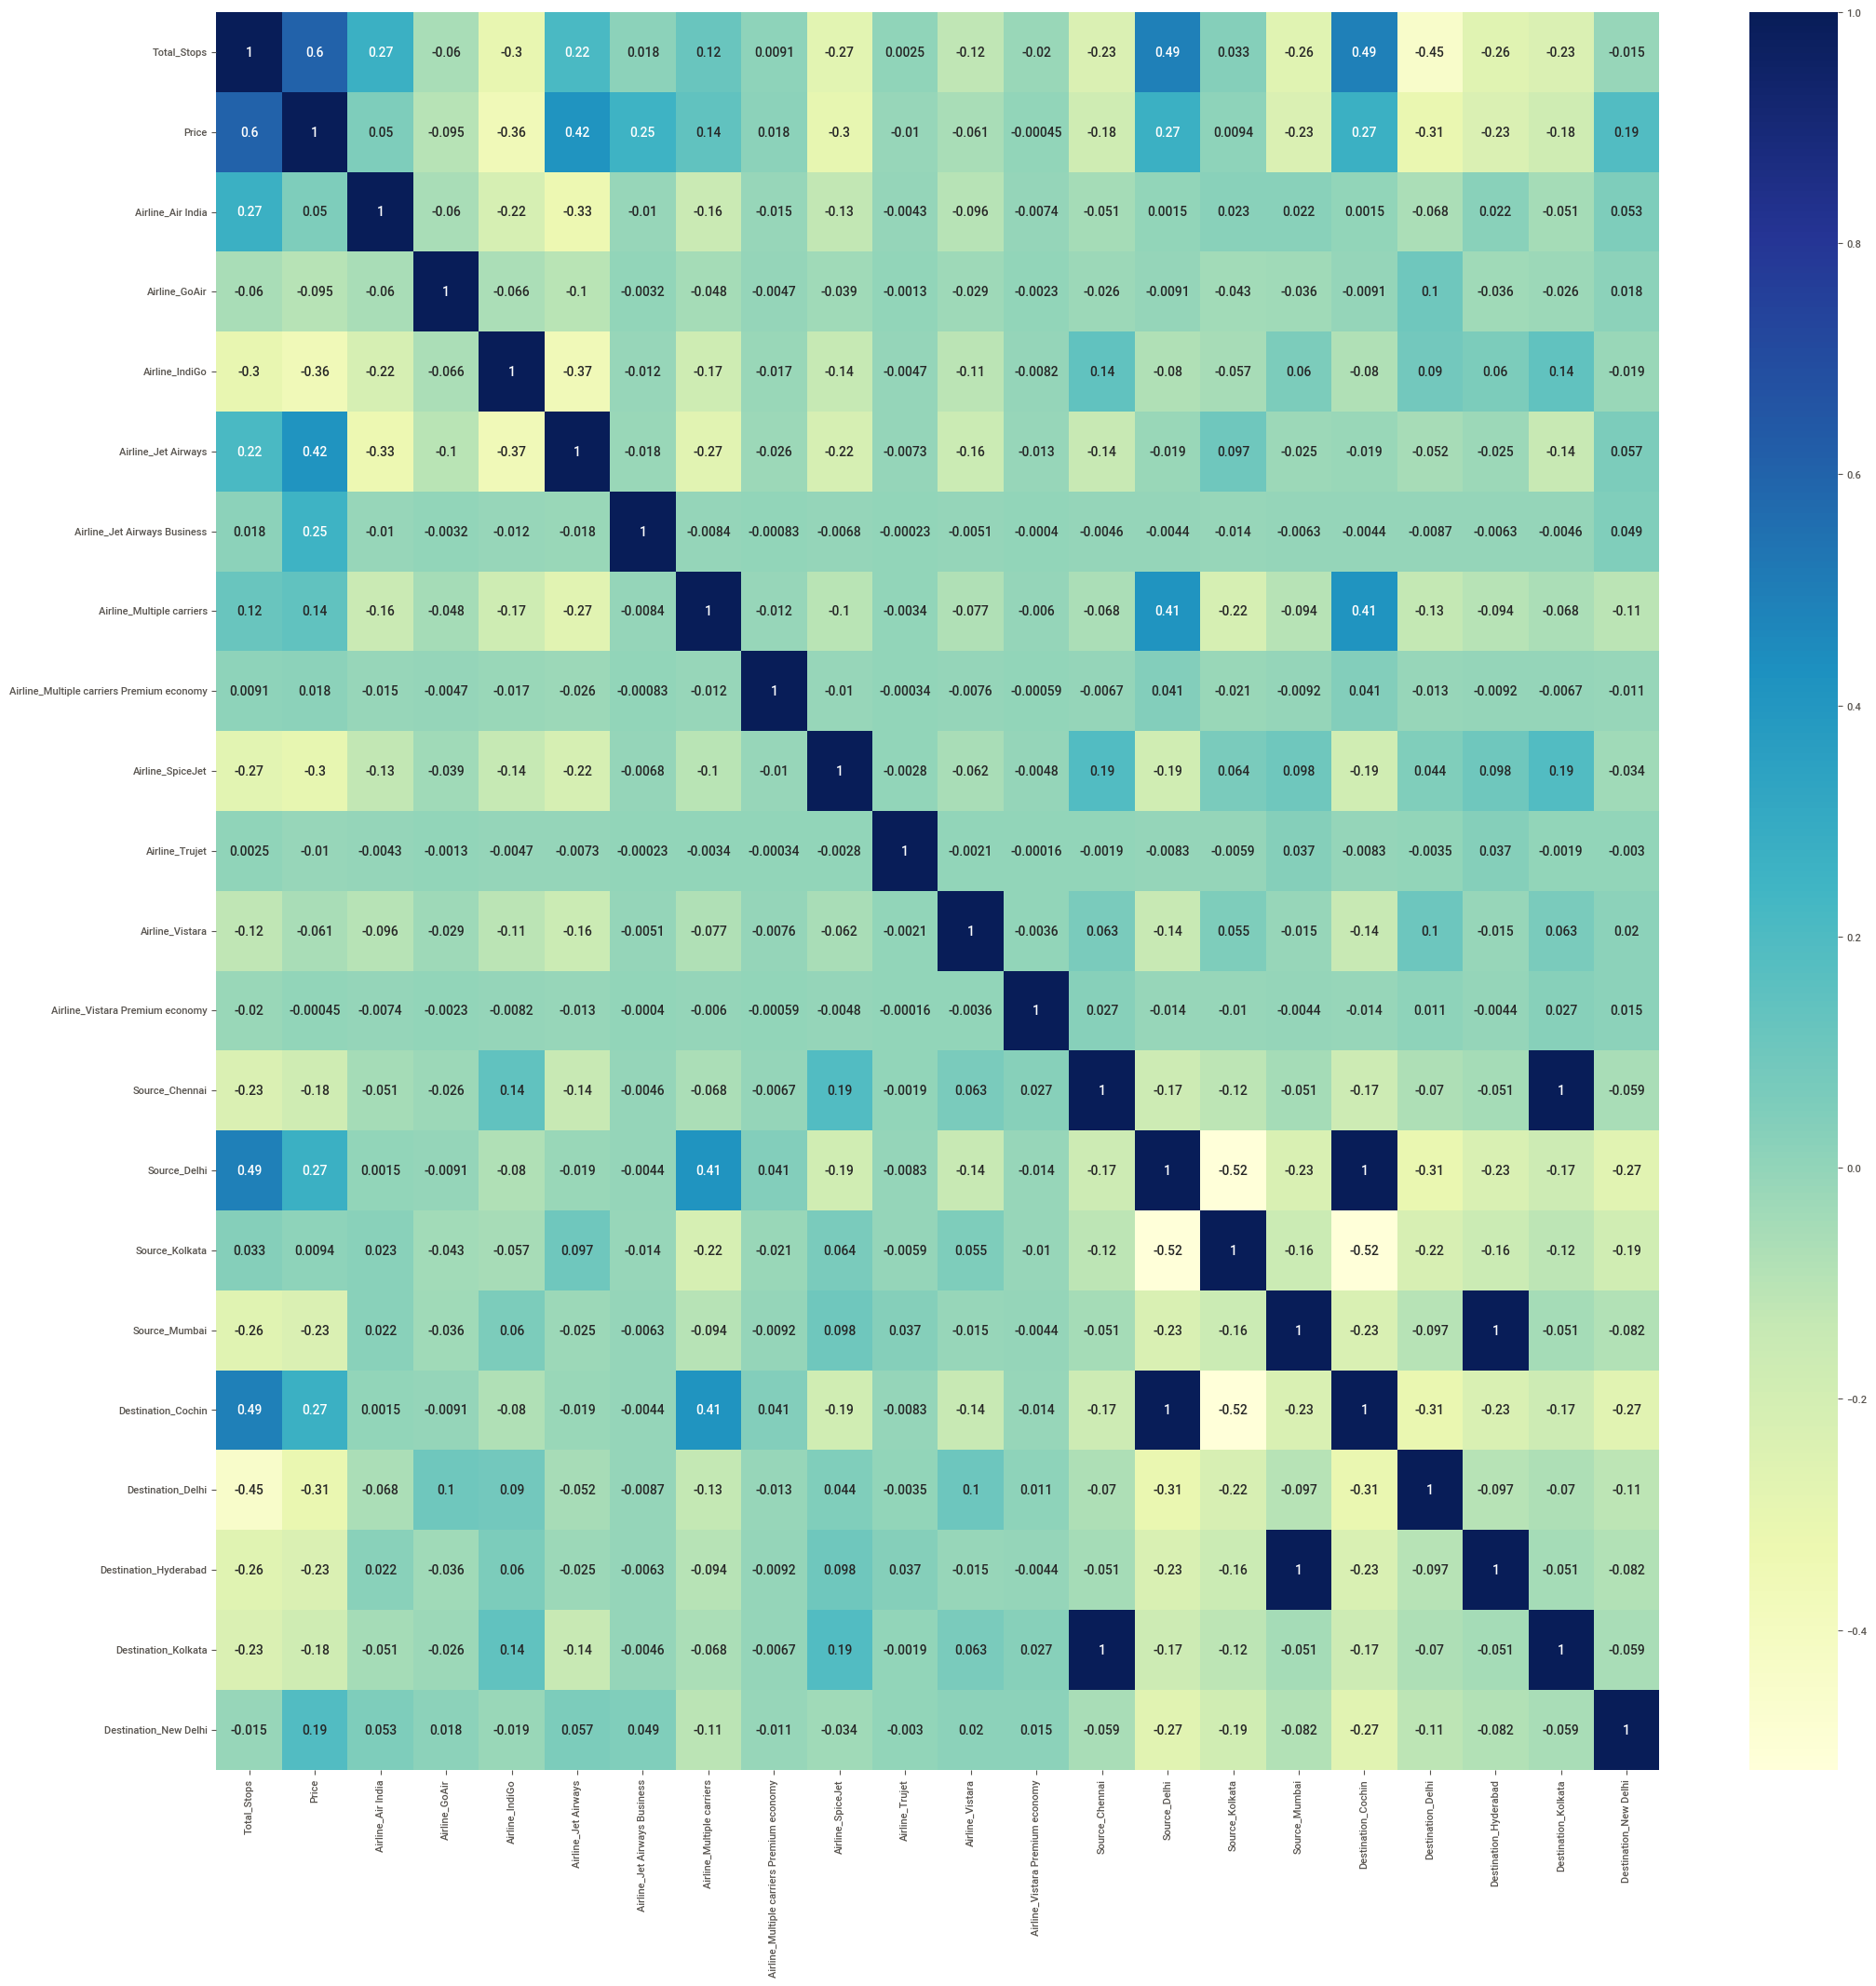

In [798]:
plt.figure(figsize =(25,25))
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')

In [799]:
## Changing data type of numerical columns from object to int

data.Date=data.Date.astype('int64')
data.Month = data.Month.astype('int64')
data.Year = data.Year.astype('int64')
data.Dep_Time_Hour = data.Dep_Time_Hour.astype('int64')
data.Dep_Time_Min = data.Dep_Time_Min.astype('int64')
data.Arrival_date = data.Arrival_date.astype('int64')
data.Arrival_Time_Hour = data.Arrival_Time_Hour.astype('int64')
data.Arrival_Time_Min = data.Arrival_Time_Min.astype('int64')
data.dur_hour = data.dur_hour.astype('int64')
data.dur_min = data.dur_min.astype('int64')

In [800]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 32 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Total_Stops                                10683 non-null  int32
 1   Price                                      10683 non-null  int64
 2   Date                                       10683 non-null  int64
 3   Month                                      10683 non-null  int64
 4   Year                                       10683 non-null  int64
 5   Dep_Time_Hour                              10683 non-null  int64
 6   Dep_Time_Min                               10683 non-null  int64
 7   Arrival_date                               10683 non-null  int64
 8   Arrival_Time_Hour                          10683 non-null  int64
 9   Arrival_Time_Min                           10683 non-null  int64
 10  dur_hour                                   106

# Handling Outliers

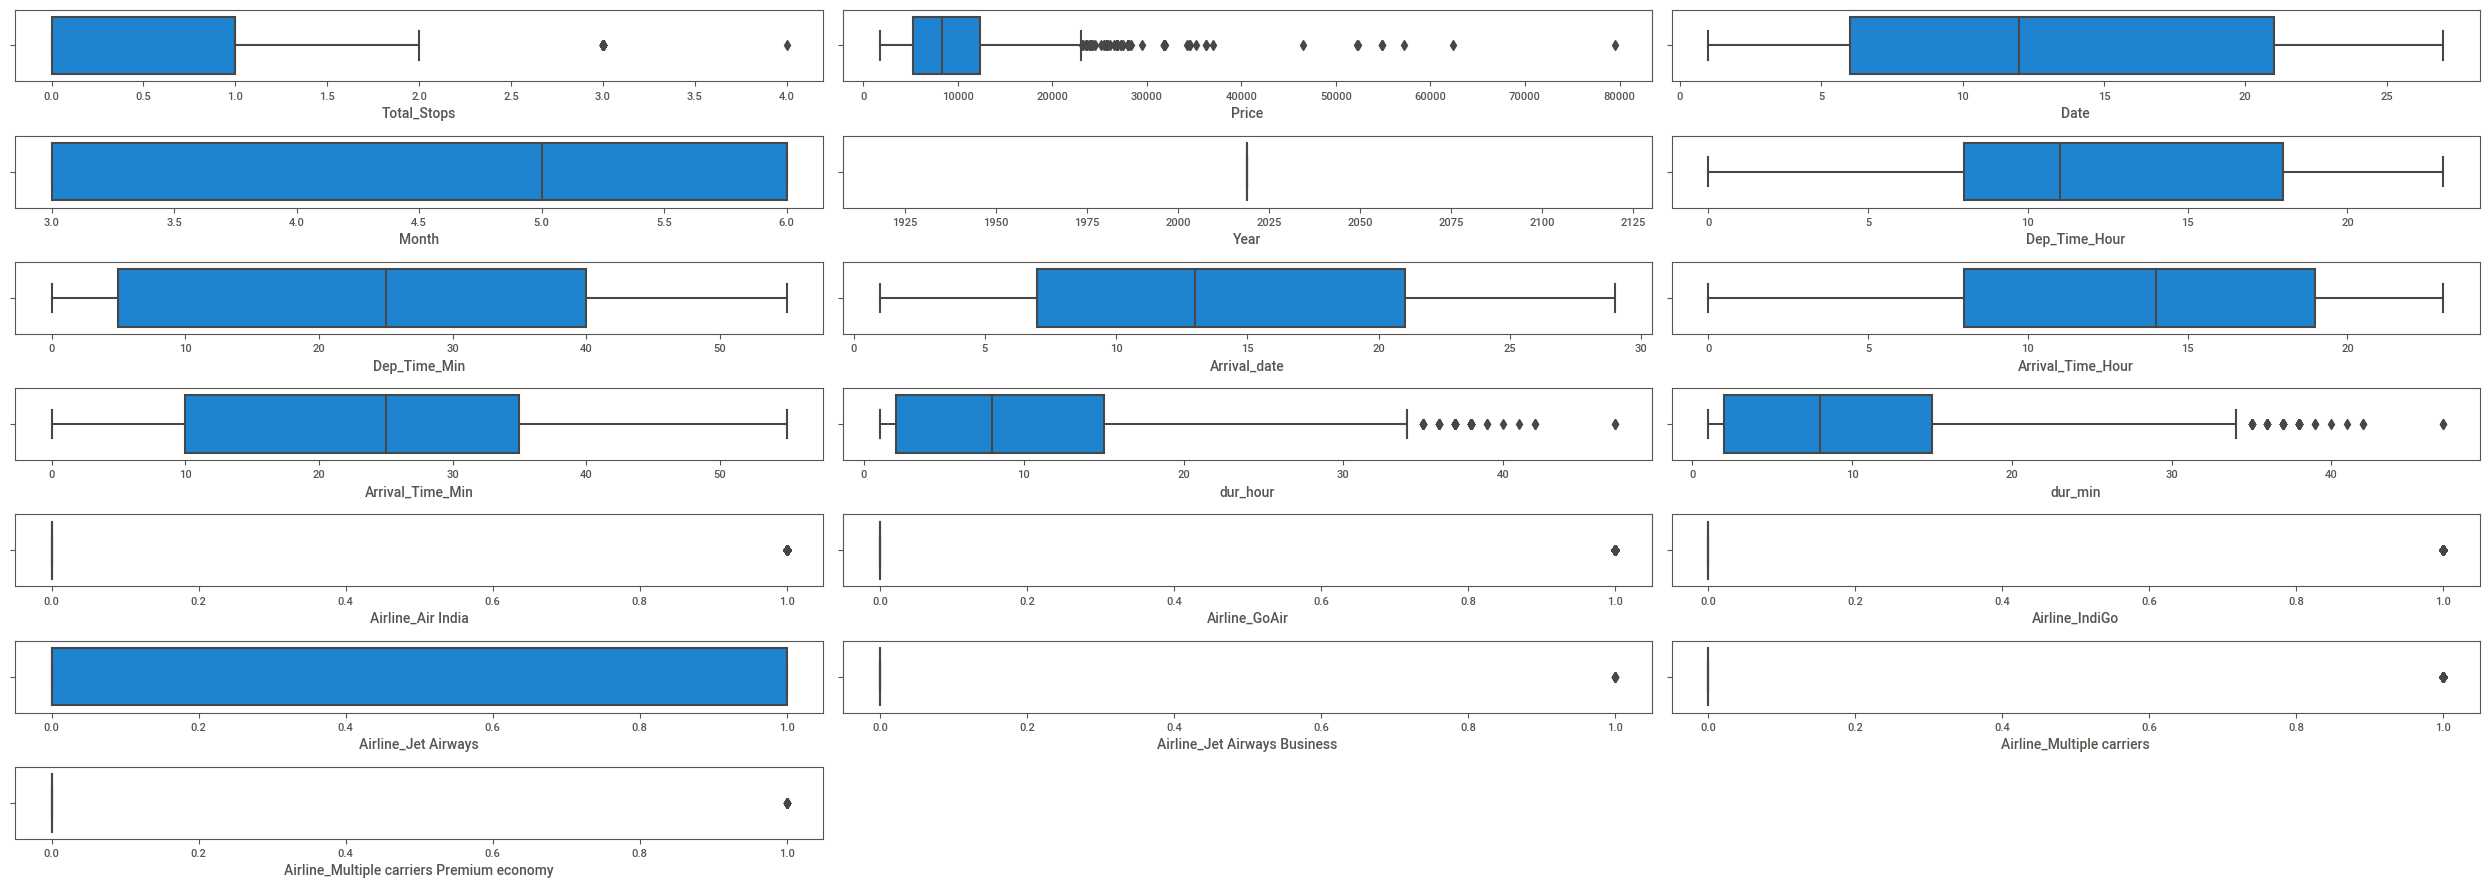

In [801]:
plt.figure(figsize=(25,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<20:
        ax = plt.subplot(20,3,plotnumber)
        sns.boxplot(x=data[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.tight_layout()

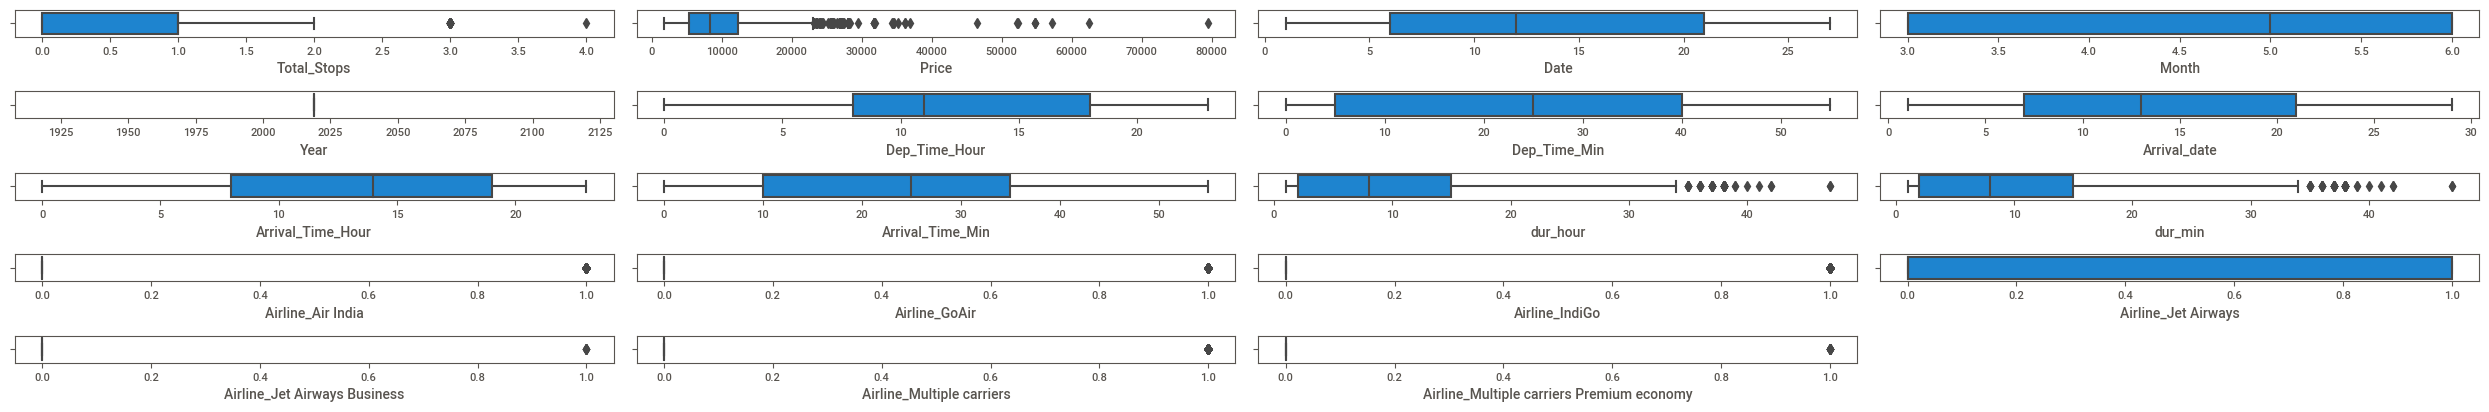

In [802]:
plt.figure(figsize=(25,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<20:
        ax = plt.subplot(31,4,plotnumber)
        sns.boxplot(x=data[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.tight_layout()

onl for Total_stops and dur_hours and dur_mins we need to handle outliers

<AxesSubplot:xlabel='Total_Stops'>

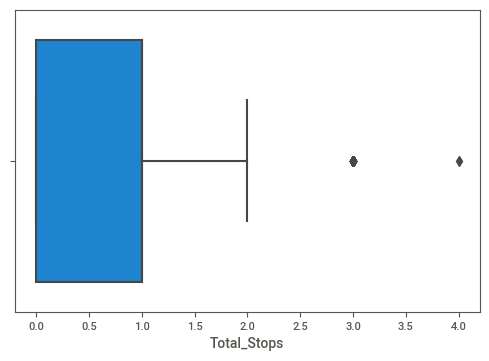

In [803]:
sns.boxplot(data.Total_Stops)

In [804]:
from scipy import stats

IQR = stats.iqr(data.Total_Stops, interpolation = 'midpoint')

IQR

1.0

In [805]:
Q1 = data.Total_Stops.quantile(0.25)

Q3 = data.Total_Stops.quantile(0.75)

min_limit =  Q1 - 1.5 *IQR

max_limit = Q3 +1.5*IQR

In [806]:
data.shape

(10683, 32)

In [807]:
len(data.loc[data['Total_Stops']>max_limit])

46

In [808]:
len(data.loc[data['Total_Stops']<min_limit])

0

In [809]:
47/10683 ##total row/total lines

0.004399513245343069

In [810]:
data.shape[0] #10683
len(data.loc[data['Total_Stops']>max_limit])
47/10683*100

0.43995132453430685

In [811]:
data.loc[data['Total_Stops']>max_limit,'Total_Stops']=np.median(data.Total_Stops)

In [812]:
data.loc[data['Total_Stops']>max_limit]

,Total_Stops,Price,Date,Month,Year,Dep_Time_Hour,Dep_Time_Min,Arrival_date,Arrival_Time_Hour,Arrival_Time_Min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi


<AxesSubplot:xlabel='Total_Stops'>

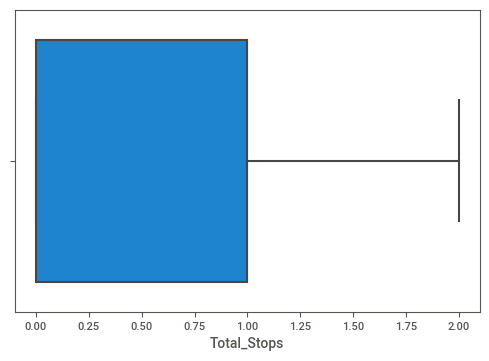

In [813]:
sns.boxplot(data.Total_Stops)

<AxesSubplot:xlabel='dur_hour'>

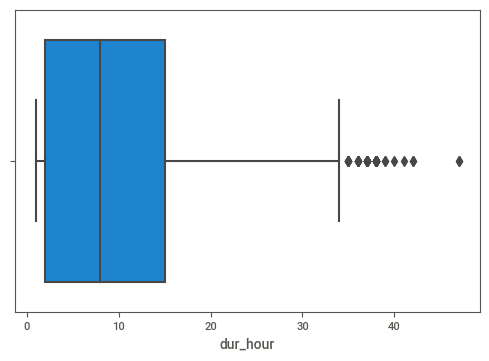

In [814]:
sns.boxplot(data.dur_hour)

In [815]:
IQR = stats.iqr(data.dur_hour, interpolation = 'midpoint')

IQR

13.0

In [816]:
Q1 = data.dur_hour.quantile(0.25)

Q3 = data.dur_hour.quantile(0.75)

min_limit = Q1 - 1.5*IQR

max_limit = Q3 + 1.5*IQR

In [817]:
min_limit

-17.5

In [818]:
max_limit

34.5

In [819]:
len(data.loc[data['dur_hour']>max_limit])

73

In [820]:
data.shape[0] #10683
len(data.loc[data['dur_hour']>max_limit])
73/10683*100

0.6833286530000936

In [821]:
data.loc[data['dur_hour']>max_limit,'dur_hour']=np.median(data.dur_hour)

In [822]:
data.loc[data['dur_hour']>max_limit]

,Total_Stops,Price,Date,Month,Year,Dep_Time_Hour,Dep_Time_Min,Arrival_date,Arrival_Time_Hour,Arrival_Time_Min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi


<AxesSubplot:xlabel='dur_hour'>

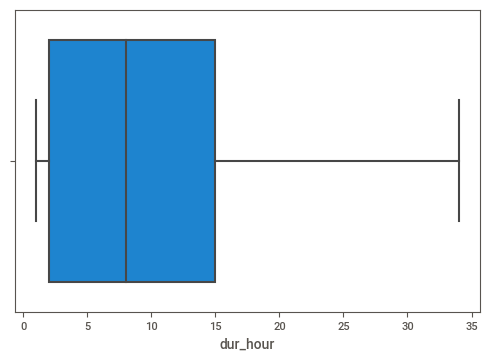

In [823]:
sns.boxplot(data.dur_hour)

<AxesSubplot:xlabel='dur_min'>

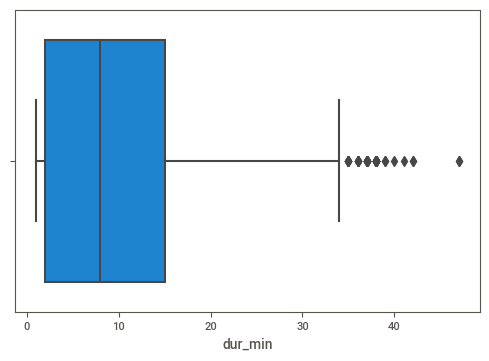

In [824]:
sns.boxplot(data.dur_min)

In [825]:
QR = stats.iqr(data.dur_min, interpolation = 'midpoint')

IQR

13.0

In [826]:
Q1 = data.dur_hour.quantile(0.25)

Q3 = data.dur_hour.quantile(0.75)

min_limit = Q1 - 1.5*IQR

max_limit = Q3 + 1.5*IQR

In [827]:
min_limit

-17.5

In [828]:
max_limit

34.5

In [829]:
len(data.loc[data['dur_min']>max_limit])

73

In [830]:
data.shape[0] #10683
len(data.loc[data['dur_hour']>max_limit])
73/10683*100

0.6833286530000936

In [831]:
data.loc[data['dur_min']>max_limit,'dur_min']=np.median(data.dur_min)

In [832]:
data.loc[data['dur_min']>max_limit]

,Total_Stops,Price,Date,Month,Year,Dep_Time_Hour,Dep_Time_Min,Arrival_date,Arrival_Time_Hour,Arrival_Time_Min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi


<AxesSubplot:xlabel='dur_min'>

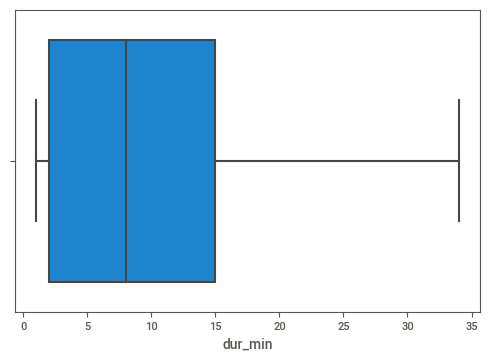

In [833]:
sns.boxplot(data.dur_min)

We have completely cleared the outliers

# Model Creation

In [834]:
##Lets bring all the features to a commom scale using Standard Scaler

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [835]:
x=data.drop(['Price'],axis=1)
y=data['Price']

In [836]:
dataset = sc.fit_transform(x)

x = pd.DataFrame(dataset,columns=x.columns)

In [837]:
## Importing packages

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [838]:
## Creating objects for the data models

dt = DecisionTreeRegressor()
svr = SVR()
Knn = KNeighborsRegressor()
lr = LinearRegression()

In [839]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=70, test_size=0.3)
for i in (dt,svr,Knn,lr):
    i.fit(x_train, y_train)
    pred = i.predict(x_test)
    test_score = r2_score(y_test,pred)
    train_score = r2_score(y_train, i.predict(x_train))
    if abs(train_score-test_score)<0.1:
        print(i)
        #print('At Random state')
        print('R2 score is', r2_score(y_test, pred))
        print('R2 for train date', r2_score(y_train, i.predict(x_train)))
        print('Mean absolute error is', mean_absolute_error(y_test,pred))
        print('Mean squared error is', mean_squared_error(y_test,pred))
        print('Root mean squared error is',(mean_squared_error(y_test,pred,squared=False)))
        print('------------------------------------------------------')             

SVR()
R2 score is 0.06195835347993661
R2 for train date 0.055557313867423797
Mean absolute error is 3320.688041148315
Mean squared error is 19810861.74973218
Root mean squared error is 4450.939423282705
------------------------------------------------------
KNeighborsRegressor()
R2 score is 0.7499130618421402
R2 for train date 0.8415640620026628
Mean absolute error is 1435.3559438377538
Mean squared error is 5281682.082708269
Root mean squared error is 2298.1910457375534
------------------------------------------------------
LinearRegression()
R2 score is 0.6300147000956803
R2 for train date 0.6163950518159736
Mean absolute error is 1947.6572959734078
Mean squared error is 7813861.626538034
Root mean squared error is 2795.328536422514
------------------------------------------------------


### Creating the model using RandomForestRegressor And GradientBoostingRegressor

In [840]:
x=data.drop(['Price'],axis=1)
y=data['Price']

In [841]:
#Importing  The Random forest regressor an GradienBoostingRegressor

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [842]:
rfr = RandomForestRegressor()
gd = GradientBoostingRegressor()

In [843]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.3, random_state=100)
for i in [rfr, gd]:
    i.fit(x_train, y_train)
    pred = i.predict(x_test)
    test_score = r2_score(y_test,pred)
    train_score = r2_score(y_train,i.predict(x_train))
    if abs(train_score -test_score)<=0.2:
        print(i)
        print('R2 score is',r2_score(y_test,pred))
        print('R2 for train data', r2_score(y_train,i.predict(x_train)))
        print('Mean absolute error is ', mean_absolute_error(y_test,pred))
        print('Mean squared error is', mean_squared_error(y_test,pred))
        print('Root Mean squared error is',(mean_squared_error(y_test,pred, squared=False)))
        print('-----------------------------------------------')

RandomForestRegressor()
R2 score is 0.8234804765821917
R2 for train data 0.9556194015906815
Mean absolute error is  1170.205533180271
Mean squared error is 3690902.556102387
Root Mean squared error is 1921.1721828358818
-----------------------------------------------
GradientBoostingRegressor()
R2 score is 0.7792294899171748
R2 for train data 0.7764765534877943
Mean absolute error is  1528.2436620830838
Mean squared error is 4616160.43483223
Root Mean squared error is 2148.525176681025
-----------------------------------------------


Random Forest model gives us the best accuracy with an R2 score of 82% but the model is overfitting on train data

we will try to tune this model to checl if we can remove overfitting

Gardient boosting also gives a score of 78% which is better than KNeighbors and the model is
not overfitting as well

### Creating the model using XGBoost Regressor

In [864]:
import xgboost
# creating a model

from xgboost import XGBRegressor
xgb_r=XGBRegressor()
xgb_r.fit(x_train,y_train)
y_hatt=xgb_r.predict(x_test)


In [865]:
xgb = XGBRegressor

In [868]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.5,random_state=100)
for i in [xgb_r]:
    i.fit(x_train, y_train)
    pred = i.predict(x_test)
    test_score = r2_score(y_test,pred)
    train_score = r2_score(y_train,i.predict(x_train))
    if abs(train_score-test_score)<=0.5:
        print(i)
        print('R2 score is',r2_score(y_test,pred))
        print('R2 for train data', r2_score(y_train,i.predict(x_train)))
        print('Mean absolute error is ', mean_absolute_error(y_test,pred))
        print('Mean squared error is', mean_squared_error(y_test,pred))
        print('Root Mean squared error is',(mean_squared_error(y_test,pred, squared=False)))
        print('--------------------------')

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
R2 score is 0.8319292306871882
R2 for train data 0.951532015038776
Mean absolute error is  1232.3883086575502
Mean squared error is 3530876.1380954073
Root Mean squared error is 1879.0625689676774
--------------------------


# Cross Validation

We test cross validation for Random forest and Gradient boosting regressor

In [694]:
# Importing cross val score from model_selection

from sklearn.model_selection import cross_val_score

In [695]:
for i in range(2,9):
    cv = cross_val_score(rfr, x,y, cv=i)
    print(rfr, cv.mean())

RandomForestRegressor() 0.8042785280397243
RandomForestRegressor() 0.8053057117434509
RandomForestRegressor() 0.8054112151473233
RandomForestRegressor() 0.8112992421960923
RandomForestRegressor() 0.8077512437434202
RandomForestRegressor() 0.8086526253824478
RandomForestRegressor() 0.8067403439817575


In [696]:
for i in range(2,9):
    cv = cross_val_score(gd, x, y, cv=i)
    print(gd, cv.mean())

GradientBoostingRegressor() 0.7663779090991507
GradientBoostingRegressor() 0.7671908253330747
GradientBoostingRegressor() 0.7679915995539767
GradientBoostingRegressor() 0.7665221703474089
GradientBoostingRegressor() 0.767885252449907
GradientBoostingRegressor() 0.7683878066950072
GradientBoostingRegressor() 0.7680042377565985


In [869]:
for i in range(2,9):
    cv = cross_val_score(xgb_r, x, y, cv=i)
    print(xgb_r, cv.mean())

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...) 0.8221902538652797
XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
            

The Random Forest Regressor provide us a cross calidation score of 80%
and gradient boosting regressor gives a score of 76%. We will hypertune
both the models to check if our accuracy improves and we can see XG booster giving 84% of accuracy

# Hypertuning the model

In [885]:
from sklearn.model_selection import GridSearchCV

In [886]:
param_grid = {'n_estimators':[10,30,50,70,100], 'max_depth':[None,1,2,3], 'max_samples':[50,100,250,500,1000],
             'min_samples_split':[2,4,10]}
gcv_rfr = GridSearchCV(rfr,param_grid, cv=3)

In [887]:
#Fitting the model

res = gcv_rfr.fit(x_train,y_train)

In [873]:
# Checking best params

res.best_params_

{'max_depth': None,
 'max_samples': 1000,
 'min_samples_split': 2,
 'n_estimators': 50}

In [874]:
param_grid2 ={'alpha':[0.9,0.09,0.1],'learning_rate':[0.1,0.01],'max_depth':[3,4,5], 'min_samples_leaf':[1,2,3],
             'min_samples_split': [2,3,4], 'n_estimators':[100,50,10]}

In [875]:
gcv_gd = GridSearchCV(gd,param_grid2, cv=3)

In [876]:
#Fitting the model

res2 = gcv_gd.fit(x_train,y_train)

In [877]:
res.best_params_

{'max_depth': None,
 'max_samples': 1000,
 'min_samples_split': 2,
 'n_estimators': 50}

In [878]:
#Randomized Search CV using XGBoost Regressor

# Number of estimators
n_estimators =[int(x) for x in np.linspace(start = 100, stop=1200, num =12)]

#Maximum depth
max_depth = [int(x) for x in np.linspace(5, 30, num=6)]

In [879]:
# create a random grid

xgb_grid = {'n_estimators': n_estimators, 
           'max_depth': max_depth}

In [880]:
from sklearn.model_selection import RandomizedSearchCV

In [881]:
##Random searc5 fold crossh of parameters, using 5 fold cross validation
# search across 100 different combinations
xgb_random = RandomizedSearchCV(estimator=xgb_r, param_distributions=xgb_grid, verbose=2, random_state=42,
                               n_jobs=1)

In [882]:
xgb_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ......................max_depth=5, n_estimators=500; total time=   0.8s
[CV] END ......................max_depth=5, n_estimators=500; total time=   0.6s
[CV] END ......................max_depth=5, n_estimators=500; total time=   0.6s
[CV] END ......................max_depth=5, n_estimators=500; total time=   0.6s
[CV] END ......................max_depth=5, n_estimators=500; total time=   0.6s
[CV] END .....................max_depth=30, n_estimators=300; total time=   2.5s
[CV] END .....................max_depth=30, n_estimators=300; total time=   2.4s
[CV] END .....................max_depth=30, n_estimators=300; total time=   2.4s
[CV] END .....................max_depth=30, n_estimators=300; total time=   2.5s
[CV] END .....................max_depth=30, n_estimators=300; total time=   2.9s
[CV] END .....................max_depth=10, n_estimators=700; total time=   2.2s
[CV] END .....................max_depth=10, n_es

RandomizedSearchCV(estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          callbacks=None, colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=0, gpu_id=-1,
                                          grow_policy='depthwise',
                                          importance_type=None,
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_bin=256, max_ca...
                                          max_delta_step=0, max_depth=6,
                                          max_leaves=0, min_child_weight=1,
                                          missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=100, n_jobs=0,
                                          num_parallel_tree=1, predictor='auto',
                                          random_state=0, reg_alpha=0,
                                          reg_lambda=1, ...),
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, verbose=2)

In [889]:
xgb_random.best_params_

{'n_estimators': 100, 'max_depth': 5}

In [892]:
xgb_r.score(x_train,y_train)

0.951532015038776

In [893]:
xgb_r.score(x_test,y_test)

0.8319292306871882

In [902]:
xgb_random.best_score_

0.792424410035761

# Conclusion

As seen above we tried to predict the flight fare using Linear Regression, Random Forest Regressor,
Gradient Boosting and XGboost Regressor. we got maximum r2_score for XGBoost Resgressor that is 84%

In [ ]:
Linear Regression        : R2 score is 0.6300147000956803

KNeighborsRegressor      : R2 score is 0.7499130618421402

Support Vector Regressor : R2 score is 0.06195835347993661

RandomForestRegressor    : R2 score is 0.8234804765821917

GradientboostingRegressor: R2 score is 0.7792294899171748

XGBoost Regressor        : R2 score is 0.8319292306871882


In [ ]:
Linear Regression        : Root mean squared error is 2795.328536422514

KNeighborsRegressor      : Root mean squared error is 2298.1910457375534

Support Vector Regressor : Root mean squared error is 4450.939423282705

RandomForestRegressor    : Root Mean squared error is 1921.1721828358818

GradientboostingRegressor: Root Mean squared error is 2148.525176681025

XGBoost Regressor        : Root Mean squared error is 1879.0625689676774


Here after hypertuning the model we got some different number but XGboost regressor we got better accuracy than other model
so we consider XGBoost regressor to predict flight charges with r2_score of 83% and we achieved task succesfully

And Least RMSE square as above we can see from the XGBoost Regressor so we will choose XGboost as our model.